# Theano  

Interest in neural networks, and in particular those with architechures that support deep learning, has been surging in recent years.  

In this notebook we will be revisiting the problem of digit classification on the MNIST data.  In doing so, we will introduce a new Python library, Theano, for working with neural networks.  Theano is a popular choice for neural networks as the same code can be run on either CPUs or GPUs.  GPUs greatly speed up the training and prediction, and is readily available. Amazon even offers GPU machines on EC2.  

In part 1, we'll introduce Theano, and refresh ourselves on the MNIST dataset.  In part 2, we'll create a multi-layer neural network with a simple architechure, and train it using backpropagation.  Part 3 will introduce the convolutional architechure, which can be said to be doing 'deep learning' (also called feature learning or representation learning).

#### Part 1: Basics

Lets start to look at Theano.  If later you'd like to go deeper into Theano, you may want to read this paper: http://www.iro.umontreal.ca/~lisa/pointeurs/theano_scipy2010.pdf

Install Theano if you haven't already.  Then let's load it, and set it to work with a CPU.  For reference, here is the Theano documentation: http://www.deeplearning.net/software/theano/library/

In [2]:
%matplotlib inline

import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import time

import theano 
from theano import tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
print(theano.config.device) # We're using CPUs (for now)
print(theano.config.floatX) # Should be 64 bit for CPUs

np.random.seed(0)

from IPython.display import display, clear_output 

import matplotlib.pyplot as plt
%matplotlib inline

cpu
float64


In [5]:
## basics: theano multiplication

a = T.scalar()
b = T.scalar()

z = a * b

mult = theano.function(inputs = [b, a], outputs = z)

print(mult(1, 2))
print(mult(4, 5))

2.0
20.0


In [6]:
# more arbitrary

# symbolic variables
a = T.scalar()
b = T.scalar()
c = T.scalar()
d = T.scalar()

# manipulation of these symbolic guys
z = a * b + c / d

# function actually does the work
complexGuy = theano.function(inputs= [a, b, c, d], outputs = z)

# here it is
print(complexGuy(3, 3, 1, 5))

9.2


In [7]:
# shared variables: both symbolic and not...

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))

xx = T.scalar()

update = [[w, w + xx]]

addition = theano.function(inputs=[xx], outputs=xx, updates=update)

# here's how you actually get it out
print(w.get_value())

0.0


In [21]:
addition(1)

print(w.get_value())

23.0


In [20]:
addition(4)
print(w.get_value())


22.0


Round  99 : 40.06774579360402
final value:  40.06774579360402


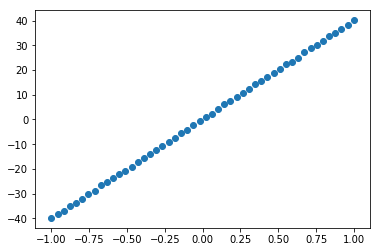

In [47]:
target_beta_1 = 40.
learning_rate = 0.01
noise = 0.2

trainX = np.linspace(-1, 1, 50)
trainY = target_beta_1 * trainX + np.random.randn(*trainX.shape) * noise

plt.scatter(trainX, trainY)

# symbolic
X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w

w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
yhat = model(X, w)

cost = T.mean(T.sqr(yhat - Y))
gradient = T.grad(cost=cost, wrt=w)

updates = [[w, w - gradient * learning_rate]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)


for i in range(100):
    for xx, yy in zip(trainX, trainY):
        cc = train(xx, yy)
    clear_output(wait=True)
    print("Round ", i, ":", w.get_value()) #, cc
        
print("final value: ", w.get_value())


Can we add an intercept to the model above?

In [50]:
## intercept model here..
target_beta_1 = 13.
target_beta_0 = -7.
learning_rate = 0.01
noise = 0.2

trainX = np.linspace(-2, 1, 50)
trainY = target_beta_0 + target_beta_1 * trainX + np.random.randn(*trainX.shape) * noise

X = T.scalar()
Y = T.scalar()

def model(X, w):
    return X * w[1] + w[0]

w = theano.shared(np.asarray([0., 0.], dtype=theano.config.floatX))
yhat = model(X, w)

cost = T.mean(T.sqr(yhat - Y))
gradient = T.grad(cost=cost, wrt=w)

updates = [[w, w - gradient * learning_rate]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

for i in range(50):
    for xx, yy in zip(trainX, trainY):
        cc = train(xx, yy)
    clear_output(wait=True)
    print("Round ", i, ":", w.get_value(), cc)
        
print("final value: ", w.get_value())

Round  49 : [ -7.0384696   13.00762295] 0.14964057545814996
final value:  [ -7.0384696   13.00762295]
